In [3]:
# Check GPU usage
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

Imports

In [2]:
import os
import shutil
import pandas as pd
import numpy as np

Import Dataset

In [4]:
list_eval_partition = pd.read_csv("dataset/list_eval_partition.csv")
list_attr_celeba = pd.read_csv("dataset/list_attr_celeba.csv")

Info about dataset

In [5]:
list_attr_celeba.head()

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Sideburns  Smiling  \
0    -1     -1        -1        -1          -1  ...         -1        1   
1    -1     -1        -1         1          -1  ...         -1        1   
2    -1     -1         1        -1          -1  ...         -1       -1   
3    -1     -1        -1        -1          -1  ...         -1       -1   
4    -1     -1         1        -1          -1  ...         -1       -1   

   Straight_Hair  Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  \
0              1         -1                 1           -1                 1   
1             -1         -1                -1           -1                -1   
2             -1          1                -1           -1                -1   
3              1         -1                 1           -1                 1   
4             -1         -1                -1           -1                 1   

   Wearing_Necklace  Wearing_Necktie  Young  
0                -1               -1      1  
1                -1               -1      1  
2                -1               -1      1  
3                 1               -1      1  
4                -1               -1      1  

[5 rows x 41 columns]

In [6]:
list_eval_partition.head()

image_id  partition
0  000001.jpg          0
1  000002.jpg          0
2  000003.jpg          0
3  000004.jpg          0
4  000005.jpg          0

Part 1 : Data pre-processing

In [7]:
list_dataset = pd.concat([list_attr_celeba ,list_eval_partition.drop(['image_id'],axis=1)],axis=1)
list_dataset.head()

image_id  5_o_Clock_Shadow  Arched_Eyebrows  Attractive  Bags_Under_Eyes  \
0  000001.jpg                -1                1           1               -1   
1  000002.jpg                -1               -1          -1                1   
2  000003.jpg                -1               -1          -1               -1   
3  000004.jpg                -1               -1           1               -1   
4  000005.jpg                -1                1           1               -1   

   Bald  Bangs  Big_Lips  Big_Nose  Black_Hair  ...  Smiling  Straight_Hair  \
0    -1     -1        -1        -1          -1  ...        1              1   
1    -1     -1        -1         1          -1  ...        1             -1   
2    -1     -1         1        -1          -1  ...       -1             -1   
3    -1     -1        -1        -1          -1  ...       -1              1   
4    -1     -1         1        -1          -1  ...       -1             -1   

   Wavy_Hair  Wearing_Earrings  Wearing_Hat  Wearing_Lipstick  \
0         -1                 1           -1                 1   
1         -1                -1           -1                -1   
2          1                -1           -1                -1   
3         -1                 1           -1                 1   
4         -1                -1           -1                 1   

   Wearing_Necklace  Wearing_Necktie  Young  partition  
0                -1               -1      1          0  
1                -1               -1      1          0  
2                -1               -1      1          0  
3                 1               -1      1          0  
4                -1               -1      1          0  

[5 rows x 42 columns]

In [8]:
list_dataset.drop(list_dataset.iloc[:,1:21],inplace=True,axis=1)
list_dataset.drop(list_dataset.iloc[:,2:-1],inplace=True,axis=1)
list_dataset.head()

image_id  Male  partition
0  000001.jpg    -1          0
1  000002.jpg    -1          0
2  000003.jpg     1          0
3  000004.jpg    -1          0
4  000005.jpg    -1          0

In [13]:
list_training_set_presence = list_dataset.query("(Male==1) and (partition==0)").iloc[:,0].values
list_training_set_absence = list_dataset.query("(Male==-1) and (partition==0)").iloc[:,0].values
list_validation_set_presence = list_dataset.query("(Male==1) and (partition==1)").iloc[:,0].values
list_validation_set_absence = list_dataset.query("(Male==-1) and (partition==1)").iloc[:,0].values
list_testing_set_presence = list_dataset.query("(Male==1) and (partition==2)").iloc[:,0].values
list_testing_set_absence = list_dataset.query("(Male==-1) and (partition==2)").iloc[:,0].values

In [14]:
path="dataset/img_align_celeba/img_align_celeba/"

In [15]:
for i in list_training_set_presence:
    shutil.copy(path+i,"dataset/Training/Man")

In [ ]:
for i in list_training_set_absence:
    shutil.copy(path+i,"dataset/Training/Woman")

In [16]:
for i in list_validation_set_presence:
    shutil.copy(path+i,"dataset/Validation/Man")

In [17]:
for i in list_validation_set_absence:
    shutil.copy(path+i,"dataset/Validation/Woman")

In [18]:
for i in list_testing_set_presence:
    shutil.copy(path+i,"dataset/Testing/Man")

In [19]:
for i in list_testing_set_absence:
    shutil.copy(path+i,"dataset/Testing/Woman")

Part 2 : Building the CNN

In [26]:
# Importing the layers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [27]:
# Initialize the CNN
classifier = Sequential()

In [28]:
# Step1- Convolution
classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
# 32 feature detectors (filters) / based on cpu issues
# stride is equal to 1 by default
# We have RGB images so they are represented in a 3D array
# 64 x64 as image size also based on cpu/gpu resources and it is a good tradeoff between quality (image resolution)
# and processing time

In [29]:
# Step2- Pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))
# goal: to reduce the size of the feature maps (output of the conv layer) while keeping the most important info(features)
# it will allow us to reduce the time complexity without reducing the performance

In [30]:
# Add a second convolution layer
classifier.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [31]:
# Step3- Flattening
classifier.add(Flatten())

In [32]:
# Step4- Full Connection
classifier.add(Dense(units=128, activation='relu')) # Hidden layer with 128 neurons
classifier.add(Dense(units=1, activation='sigmoid')) # Output layer (Binary Classification so 1 output + sigmoid)

In [33]:
# Compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)              

Part 4 : Train the model

In [5]:
img_height=64
img_width=64
batch_size=128

In [2]:
from keras_preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory(
    './dataset/Training',
    target_size=(64,64), # size of images
    batch_size=128,
    class_mode='binary'
)

test_set = test_datagen.flow_from_directory(
    './dataset/Testing',
    target_size=(64,64), # size of images
    batch_size=128,
    class_mode='binary'
)

Found 162770 images belonging to 2 classes.
Found 19962 images belonging to 2 classes.


In [47]:
# Training dataset
training_images, training_labels = next(train_datagen.flow_from_directory('./dataset/Training'))
print(training_images.dtype, training_images.shape)
print(training_labels.dtype, training_labels.shape)

training_ds = tf.data.Dataset.from_generator(
    lambda: train_datagen.flow_from_directory('./dataset/Training'),
    output_types=(tf.float32, tf.float32),
    output_shapes=([32,256,256,3], [32,2])
)

Found 162770 images belonging to 2 classes.
float32 (32, 256, 256, 3)
float32 (32, 2)


In [45]:
# Testing dataset
testing_images, testing_labels = next(train_datagen.flow_from_directory('./dataset/Testing'))
print(training_images.dtype, training_images.shape)
print(training_labels.dtype, training_labels.shape)

testing_ds = tf.data.Dataset.from_generator(
    lambda: train_datagen.flow_from_directory('./dataset/Testing'),
    output_types=(tf.float32, tf.float32),
    output_shapes=([32,256,256,3], [32,2])
)

Found 19962 images belonging to 2 classes.
float32 (32, 256, 256, 3)
float32 (32, 2)


In [ ]:
history=classifier.fit(training_ds.prefetch(tf.data.AUTOTUNE),
               epochs=10,
               validation_data=test_set)

In [ ]:
classifier.save('test.h5')

    Part 5 : Testing the model

In [6]:
validation_set = tf.keras.utils.image_dataset_from_directory('./dataset/Testing',
                                                                 shuffle=True,
                                                                 batch_size=batch_size,
                                                                 image_size=(img_height,img_width))

Found 19962 files belonging to 2 classes.


In [7]:
from keras.models import load_model
classifier_cnn = load_model('Tensorflow_models/cnn_25_epochs_1.h5')

Evaluation

In [8]:
# Evaluate the model on validation set
score=classifier_cnn.evaluate(validation_set)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])

156/156 [==============================] - 6s 19ms/step - loss: 11.5069 - accuracy: 0.9605

 Test accuracy: 0.9604749083518982


Prediction

In [9]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

# Retrieve a batch of images from the test set
image_batch, label_batch = validation_set.as_numpy_iterator().next()
predictions = classifier_cnn.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = (predictions>0.5)

a = accuracy_score(predictions, label_batch)
print('Accuracy is:', a*100)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

class_names=validation_set.class_names

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

Accuracy is: 98.4375
Predictions:
 [ True  True  True  True False  True  True  True False  True False  True
  True  True  True  True  True  True  True False False  True  True  True
 False False  True  True  True False  True  True False  True  True False
 False  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True False False  True False  True  True  True  True
 False  True  True False  True  True  True False  True  True  True  True
  True  True  True False  True False  True False  True  True False False
  True False False False False False  True False  True  True  True  True
 False  True False  True False  True False False  True False False False
 False  True False  True  True  True False False  True  True False False
  True  True False False False False False  True]
Labels:
 [1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 0 1 0 1 1 0 0 1 0 0

Confusion matrix

In [10]:
# Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(label_batch,predictions)

import seaborn as sns
#Visual Confusion matrix
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Prediction on images no belonging the dataset

In [29]:
outside_prediction_set = tf.keras.utils.image_dataset_from_directory('./dataset/Outside_predictions',
                                                                 shuffle=True,
                                                                 batch_size=batch_size,
                                                                 image_size=(img_height,img_width))

Found 6 files belonging to 2 classes.


Accuracy is: 83.33333333333334
Predictions:
 [False  True False False False False]
Labels:
 [0 1 0 0 0 1]


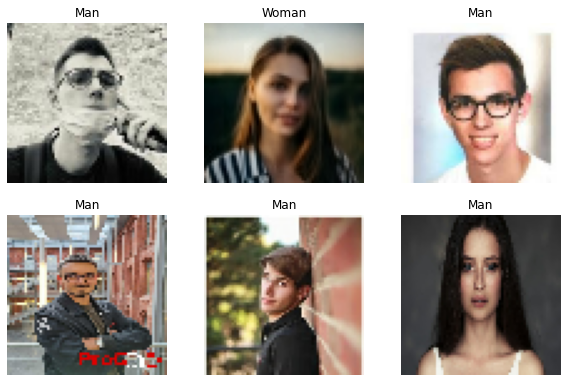

In [30]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score

# Retrieve a batch of images from the test set
image_batch, label_batch = outside_prediction_set.as_numpy_iterator().next()
predictions = classifier_cnn.predict_on_batch(image_batch).flatten()

# Apply a sigmoid since our model returns logits
predictions = tf.nn.sigmoid(predictions)
predictions = (predictions>0.5)

a = accuracy_score(predictions, label_batch)
print('Accuracy is:', a*100)

print('Predictions:\n', predictions.numpy())
print('Labels:\n', label_batch)

class_names=outside_prediction_set.class_names

plt.figure(figsize=(10, 10))
for i in range(6):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]])
  plt.axis("off")

In [ ]:
import numpy as np
from keras_preprocessing import image

test_image1 = image.load_img('./dataset/Outside_predictions/Man/01.jpg', target_size=(64,64))

test_image1 = image.img_to_array(test_image1).astype('float32')/255
test_image = np.expand_dims(test_image1, axis=0)

result = classifier_cnn.predict(test_image1)
print(result)


if result>=0.5:
    prediction = 'Male'
else:
    prediction = 'Female'

print(prediction)


ValueError: in user code:

    File "c:\users\gabri\onedrive\hei4\s8\intelligence artificielle\ai_project_celebfaces\venv\lib\site-packages\keras\engine\training.py", line 1801, in predict_function  *
        return step_function(self, iterator)
    File "c:\users\gabri\onedrive\hei4\s8\intelligence artificielle\ai_project_celebfaces\venv\lib\site-packages\keras\engine\training.py", line 1790, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\users\gabri\onedrive\hei4\s8\intelligence artificielle\ai_project_celebfaces\venv\lib\site-packages\keras\engine\training.py", line 1783, in run_step  **
        outputs = model.predict_step(data)
    File "c:\users\gabri\onedrive\hei4\s8\intelligence artificielle\ai_project_celebfaces\venv\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
        return self(x, training=False)
    File "c:\users\gabri\onedrive\hei4\s8\intelligence artificielle\ai_project_celebfaces\venv\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\users\gabri\onedrive\hei4\s8\intelligence artificielle\ai_project_celebfaces\venv\lib\site-packages\keras\engine\input_spec.py", line 264, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 64, 64, 3), found shape=(32, 64, 3)
